<a href="https://colab.research.google.com/github/Alina1-10/NM/blob/main/%D0%9B%D0%B0%D0%B1_%D1%80_13_%D0%93%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B0_%D0%90%D0%BB%D1%96%D0%BD%D0%B0_7_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.5    2.7006 2.9052 3.1133 3.3246 3.5387 3.7552 3.9741 4.1949 4.4177
 4.6422]


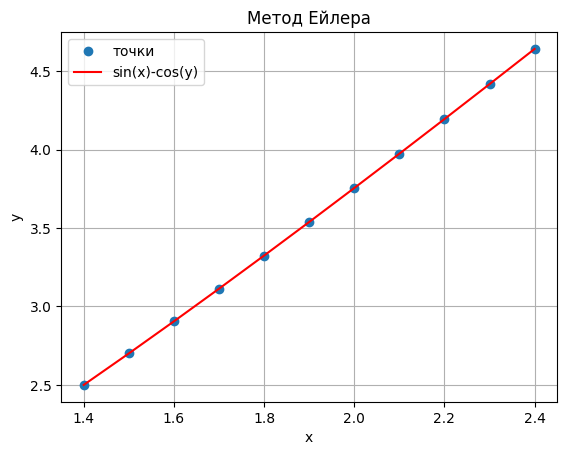

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x, y):
    return x + math.cos(y / math.e)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.4, 2.4, 0.1, 2.5

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "sin(x)-cos(y)"])
plt.grid()
plt.show()

In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 
y = [0.6    0.6788 0.7707 0.8762 0.9958 1.1297 1.2785 1.4426 1.6222 1.8175
 2.0288]


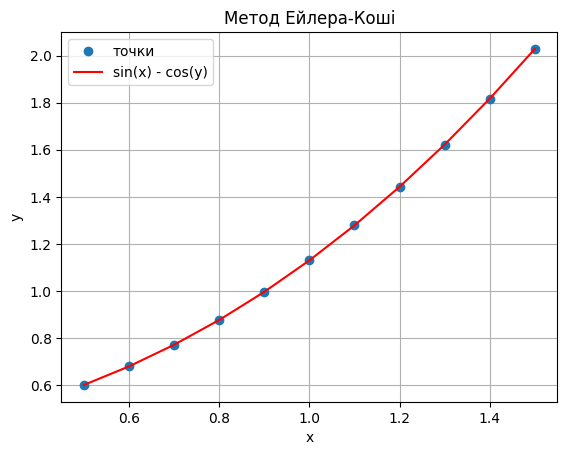

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import math


def f(x, y):
    return x + np.sin(y / np.sqrt(7))

a = 0.5  # ліва межа відрізку
b = 1.5 # права межа відрізку
h = 0.1  # крок
y0 = 0.6  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x) - cos(y)"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [2.5        2.63730156 2.80531037 3.00178455 3.22446443 3.47112277]


/tmp/ipython-input-2818005074.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return x + math.cos(y / math.e)


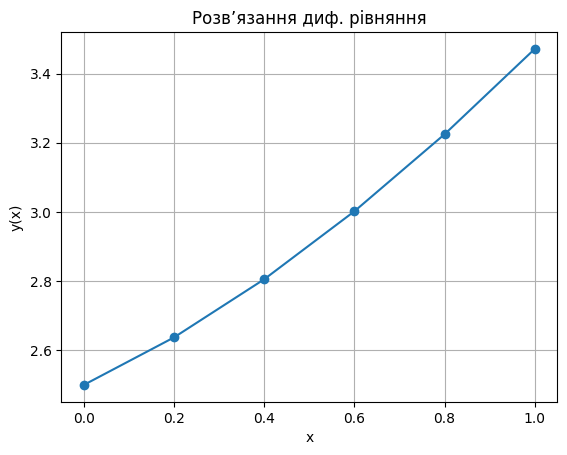

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import math

# Функція, що повертає dy/dx
def model(y, x):
    return x + math.cos(y / math.e)

# Початкова умова
y0 = 2.5

# Значення х
x = np.array([i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [2.5        2.63730256 2.8053111  3.00177679 3.22445812 3.47112825]


/tmp/ipython-input-3182187609.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return x + math.cos(y / math.e)


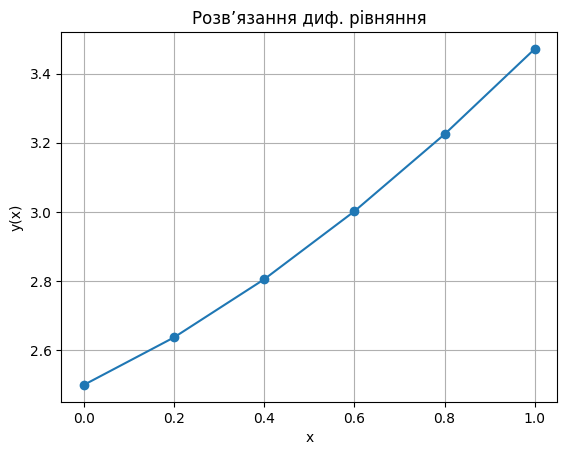

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
# Функція, що повертає dy/dx
def model(x, y):
    return x + math.cos(y / math.e)

# Початкова умова
y0 = [2.5]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 6)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
